<a href="https://colab.research.google.com/github/ProgrammerDavid1/Data-Analysis/blob/main/Data%20Analyze%208)%20Data%20Clustering%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석프로그래밍 14주차 실습

## 실습 시작 전 유의사항

※ 반드시 상단 메뉴에서 '**파일 - 드라이브에 사본 저장**' 진행 후 시작하세요.

## 실습 개요
- 군집화 (Clustering)
 - K-Means Clustering
 - Hierarchical Clustering

---

## 클러스터링
정답 레이블을 제공하지 않는 비지도학습 방식 중 하나인 **클러스터링**은,\
데이터의 분포를 바탕으로 결이 비슷한 데이터들끼리 묶어 그룹화시키는 작업입니다.

<img src="https://t1.daumcdn.net/cfile/tistory/99BFCE395C6919EA04" width="40%">

</br>
</br>


sklearn.cluster에서는 매우 많은 클러스터링 알고리즘을 제공합니다.

알고리즘마다의 특징과 한계가 다르기 때문에 데이터의 형태에 따라서 적절한 알고리즘을 선택해야 합니다.

이 중 두 가지 대표적인 클러스터링 알고리즘을 알아보고, 직접 sklearn으로 실습해보겠습니다.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" width="70%">

### K-Means 클러스터링
전체 데이터를 k개의 중심점(Mean)을 찾는 기법입니다.

각 데이터들은 가장 가까운 중심점과 연결되고, 하나의 중심점과 연결된 데이터들이 하나의 클러스터를 형성하게 됩니다.

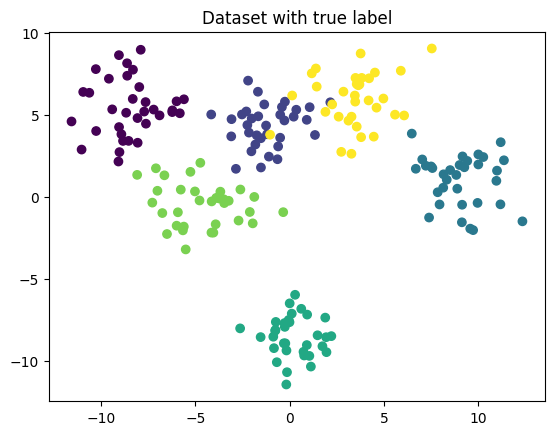

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 데이터셋 준비
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=6, cluster_std=1.5, random_state=7)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dataset with true label")
plt.show()

K-Means 알고리즘의 특징으로, 클러스터의 개수인 K를 정할 때 Elbow method를 사용합니다.

이는 클러스터 수를 1부터 점점 늘려주며 inertia 값을 계산해주다가\
감소량이 완만해지는 부분(Elbow)을 K로 지정하는 방식입니다.

이때 **inertia**는 클러스터 중심과 클러스터에 속한 샘플 사이의 거리들을 제곱하여 합한 값으로,\
작을 수록 군집화가 잘 됐다고 볼 수 있습니다.

학습이 완료된 모델에 **.inertia_**를 하여 이 값을 확인할 수 있습니다.

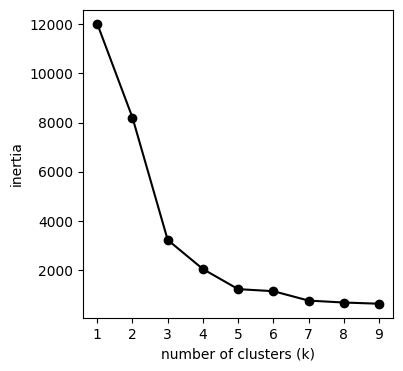

In [ ]:
from sklearn.cluster import KMeans

ks = range(1, 10)   # K를 1씩 늘려나감

inertias = []
for K in ks:
  model = KMeans(n_clusters = K)
  model.fit(X)
  inertias.append(model.inertia_)   # inertia 값을 리스트에 저장, inertia가 작으면 작을 수록 클러스터가 잘됐다

# K 값에 따른 inertia 값을 그래프로 표현
fig, ax = plt.subplots(figsize=(4, 4))    # 12000부터 시작했다가 점점 내려감. inertia 값이, 팔의 팔굽치를 찾는다고 해서, albo 메소드라고 불림
plt.plot(ks, inertias, '-ok')
plt.xticks(ks)
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

KMeans도 마찬가지로 fit을 통해 데이터를 학습시키고 predict를 통해 레이블을 예측할 수 있습니다.

하지만 이번 실습에서는 예측에 사용할 추가 데이터를 따로 제공하지는 않고,\
데이터를 어떻게 클러스터링 했는지 결과만 보도록 하겠습니다.

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# KMeans 객체를 생성
# 찾을 클러스터 개수 k를 n_clusters 매개변수에 지정해줘야 한다.
kmeans_cluster = KMeans(n_clusters = 6)

# 모델 학습
# 비지도 학습이기 때문에 y가 들어가지 않는다.
kmeans_cluster.fit(X)

# 정답과 비교
# y가 들어가지 않기 때문에 실제 레이블과 예측 레이블은 다를 수 있다.
pd.crosstab(y, kmeans_cluster.labels_)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,0,0,0,0,0,34
1,0,32,0,1,1,0
2,32,0,0,0,1,0
3,0,0,33,0,0,0
4,0,0,0,32,0,1
5,0,2,0,0,31,0


클러스터링 결과 레이블은 모델에 **.labels_**를 하여 확인할 수 있습니다.

마찬가지로 **.cluster_centers_**를 하면 각 클러스터의 중심을 확인할 수 있습니다.

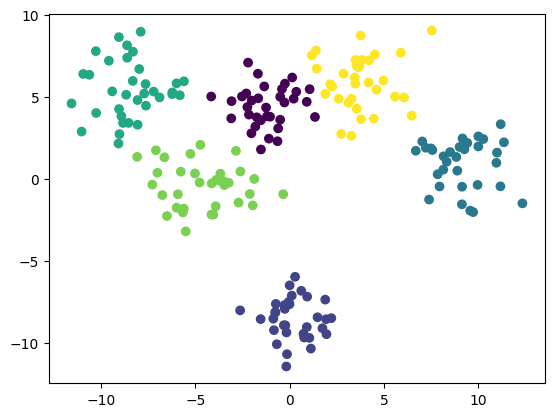

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(X[:, 0], X[:, 1], c=kmeans_cluster.labels_)
#plt.scatter(kmeans_cluster.cluster_centers_[:, 0], kmeans_cluster.cluster_centers_[:, 1], marker='*', s=200, c=range(kmeans_cluster.cluster_centers_.shape[0]), edgecolors='k')
plt.show()

아래는 KMeans 알고리즘의 과정을 애니메이션으로 시각화 하는 코드입니다.

초기에는 랜덤으로 K개 만큼의 중심점을 선택하고, 각 중심점을 기준으로 클러스터를 형성합니다.

그리고 각 클러스터의 평균을 새로운 중심점으로 선택하는 과정을 반복합니다.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
plt.close(fig)
colors = ['b', 'g', 'r', 'c', 'm', 'y']

seeds = np.random.RandomState(3).permutation(200)[:6]
init_centers = X[seeds]
init_labels = np.full(X.shape[0], 0)
for xi, data in enumerate(X):
  for i in range(1, 6):
    if np.sum((data - init_centers[i]) ** 2) < np.sum((data - init_centers[init_labels[xi]]) ** 2):
      init_labels[xi] = i
ax.set_title(f'initial')

for i in range(6):
    points = X[init_labels == i]
    ax.scatter(points[:, 0], points[:, 1], s=50, c=colors[i])
    ax.scatter(init_centers[i, 0], init_centers[i, 1], marker='*', s=200, c=colors[i], edgecolors='k')


def update(frame):
    if frame == 0:
      return

    kmeans = KMeans(n_clusters=6, init='random', max_iter=frame, n_init=1, random_state=3)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    ax.clear()
    for i in range(6):
        points = X[labels == i]
        ax.scatter(points[:, 0], points[:, 1], s=50, c=colors[i])
        ax.scatter(centers[i, 0], centers[i, 1], marker='*', s=200, c=colors[i], edgecolors='k')

    ax.set_title(f'Iteration {frame}')

ani = FuncAnimation(fig, update, frames=range(15), interval=100, blit=False, repeat=True)

HTML(ani.to_jshtml())

### Hierarchical Clustering
각 데이터 포인트들을 개별 클러스터로 간주하고 시작해서, 유사한 클러스터끼리 합쳐나가는 기법입니다.

최종적으로 n개의 클러스터가 남으면 종료됩니다.


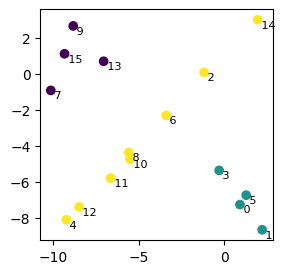

In [ ]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# KMeans 알고리즘으로는 클러스터링이 잘 되지 않는 데이터셋
X, y = datasets.make_blobs(n_samples=16, n_features=2, centers=4, cluster_std=1.5, random_state=9)
X[y>1] = datasets.make_blobs(n_samples=8, n_features=2, centers=1, cluster_std=1, random_state=7)[0]
X[y>1] = np.dot(X[y>1] * [4.5, 0.1], [[1, 1], [-1, 1]]) + [33, 33]
y[y>1] = np.full_like(y[y>1], 2)

fig, ax = plt.subplots(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y)
for i in range(len(X)):
  plt.text(X[i, 0], X[i, 1], f" {str(i)}", ha='left', va='top', fontsize=8)
plt.show()

계층적 클러스터링은 AgglomerativeClustering이라는 이름으로 제공됩니다.

이 알고리즘은 여러가지 연결 방법을 제공합니다.\
이는 linkage 매개변수로 정해줄 수 있습니다.

위의 데이터셋을 잘 군집화할 연결 방법이 무엇일지 생각해보고 매개변수를 선택해봅시다.

|**연결 방식**|single|complete|average|ward|
|---|---|---|---|---|
|**연결 기준**|최소 거리|최대 거리|평균 거리|분산|

</br>

<img src="https://tyami.github.io/assets/images/post/ML/2020-11-01-hierarchical-clustering/2020-11-01-hierarchical-clustering-09-linkage-methods.png" width="50%">


클러스터를 합칠 때, 아무 클러스터와 연결되는 것이 아닌,\
연결 했을 때 연결 기준이 가장 작아질 클러스터와 연결 합니다.

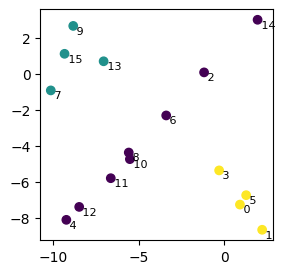

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

#cluster = KMeans(n_clusters=3)
cluster = AgglomerativeClustering(n_clusters = 3, linkage = 'single')

cluster.fit(X)

fig, ax = plt.subplots(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c= cluster.labels_)
for i in range(len(X)):
  plt.text(X[i, 0], X[i, 1], f" {str(i)}", ha='left', va='top', fontsize=8)
plt.show()

Scipy의 dendrogram을 이용하면 계층 구조를 시각화 할 수 있습니다.

덴도그램을 특정 높이에서 가로질렀을 때, 교차하는 수직선의 개수가 클러스터의 수로 결정 됩니다.

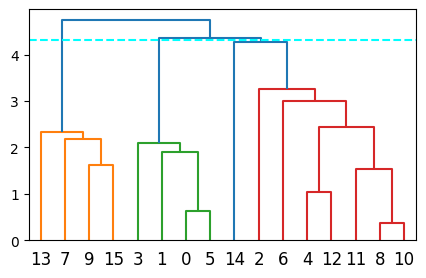

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

fig, ax = plt.subplots(figsize=(5, 3))
dendrogram_plot = dendrogram(linkage(X, method='single')) # method에 연결 방식을 넣어줘야 함.
plt.axhline(4.32, color='cyan', linestyle='--') # 4.32 부근에서 클러스터 수가 3개로 결정된다.

plt.show()

## 실습 종료 전 유의사항

※ 완료 시 우측 상단 프로필 옆 '**공유 - 액세스를 *링크가 있는 모든 사용자*로 전환**' 후 복사한 링크를 이루리 과제 란에 업로드 하세요.

<img src="https://drive.google.com/uc?id=1Zj1FKIz0sanqUfkfr3scp5M-dDgMFxYQ" height=300>

</br>

※ 추가로 상단 메뉴 '**파일 - 다운로드 - .ipynb**' 로 다운로드 후 첨부 파일로 업로드 하세요.

※ 즉, 과제의 텍스트란에는 링크를, 파일 첨부란에는 .ipynb 파일을 제출하십시오.